In [1]:
import numpy as np
import matplotlib.pyplot as plt

--- First 5 Iterations (Random Sequence) ---
Step  Coordinates (x, y)   Applied T 
-------------------------------------
P0    ( 0.1000  ,  0.1000  ) Start     
P1    ( 0.3000  ,  0.4830  ) T3 (Top)  
P2    ( 0.1500  ,  0.2415  ) T1 (Bottom-Left)
P3    ( 0.3250  ,  0.5538  ) T3 (Top)  
P4    ( 0.4125  ,  0.7099  ) T3 (Top)  
P5    ( 0.2062  ,  0.3549  ) T1 (Bottom-Left)


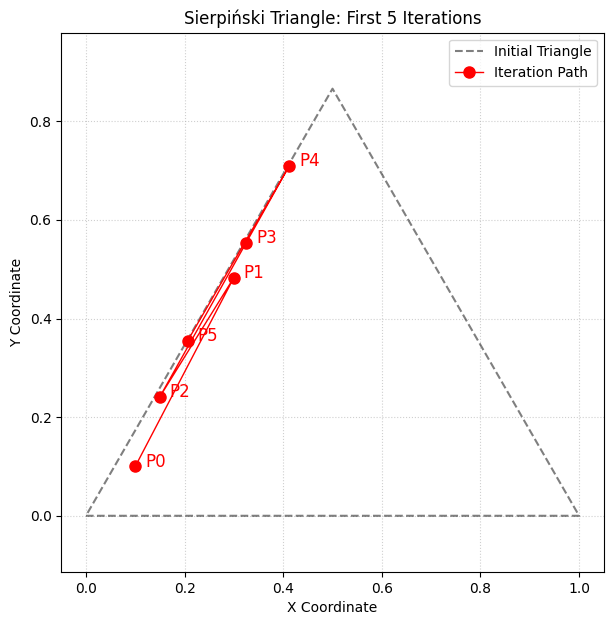

In [4]:
# Define the scaling matrix M and translation vectors b1, b2, b3
M = np.array([[0.5, 0.0],
              [0.0, 0.5]])

V3_y = np.sqrt(3) / 2
b1 = np.array([0.0, 0.0])
b2 = np.array([0.5, 0.0])
b3 = np.array([0.25, V3_y / 2]) # Translation for T3 is 1/2 of V3

# List of transformations (M, b) and their names for tracking
transformations = [
    (M, b1, "T1 (Bottom-Left)"),
    (M, b2, "T2 (Bottom-Right)"),
    (M, b3, "T3 (Top)")
]

def generate_sierpinski_path(num_points):
    # Starting point P0
    current_point = np.array([0.1, 0.1])
    points = [current_point]
    history = [("P0", current_point, "Start")]

    np.random.seed(42) # Set seed for reproducible results

    for i in range(num_points):
        # Randomly select a transformation
        index = np.random.randint(0, 3)
        M_i, b_i, name = transformations[index]

        # Apply the affine transformation: P_new = M * P_old + b
        new_point = M_i @ current_point + b_i

        points.append(new_point)
        history.append((f"P{i+1}", new_point, name))
        current_point = new_point

    return np.array(points), history

# Generate the first 5 iterations
num_iterations = 5
s_points, history = generate_sierpinski_path(num_iterations)

# Print the history table
print("--- First 5 Iterations (Random Sequence) ---")
print("{:<5} {:<20} {:<10}".format("Step", "Coordinates (x, y)", "Applied T"))
print("-" * 37)

# Print initial point P0
print("{:<5} ({:^9.4f}, {:^9.4f}) {:<10}".format(
    history[0][0], history[0][1][0], history[0][1][1], history[0][2]
))

# Print iterations P1 to P5
for i in range(1, len(history)):
    name, point, t_name = history[i]
    print("{:<5} ({:^9.4f}, {:^9.4f}) {:<10}".format(
        name, point[0], point[1], t_name
    ))

# Plot the results
plt.figure(figsize=(7, 7))
# Plot the initial triangle vertices for context
V = np.array([[0, 0], [1, 0], [0.5, np.sqrt(3)/2], [0, 0]])
plt.plot(V[:, 0], V[:, 1], 'k--', alpha=0.5, label='Initial Triangle')

# Plot the path of the points
plt.plot(s_points[:, 0], s_points[:, 1], 'ro-', markersize=8, linewidth=1, label='Iteration Path')

# Label each point P0 to P5
for i, point in enumerate(s_points):
    plt.text(point[0] + 0.02, point[1], f'P{i}', fontsize=12, color='red')

plt.title(f'Sierpiński Triangle: First {num_iterations} Iterations')
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.axis('equal')
plt.grid(True, linestyle=':', alpha=0.6)
plt.legend()
plt.savefig('sierpinski_5_iterations.png')